In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [ ]:
#cargando datos desde repositorio de seaborn (datos de ejemplo)
data=sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [ ]:
# Forma correcta
X = data[['total_bill']]
y = data['tip']
X

,total_bill
0,16.99
1,10.34
2,21.01
3,23.68
4,24.59
...,...
239,29.03
240,27.18
241,22.67
242,17.82


In [ ]:
X_cons=sm.add_constant(X)
X_cons.head()

,const,total_bill
0,1.0,16.99
1,1.0,10.34
2,1.0,21.01
3,1.0,23.68
4,1.0,24.59


In [ ]:
#Crear el modelo de regresión lineal basado en OLS (Ordinary Least Squares)

modelo=sm.OLS(y,X_cons).fit()

In [ ]:
print(modelo.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.457
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     203.4
Date:                Fri, 06 Feb 2026   Prob (F-statistic):           6.69e-34
Time:                        23:28:21   Log-Likelihood:                -350.54
No. Observations:                 244   AIC:                             705.1
Df Residuals:                     242   BIC:                             712.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9203      0.160      5.761      0.0

In [ ]:
# y = B_0+B_1X + e
# y = 0.9203+0.1050X + e
# y = 0.9203+0.1050(50)=

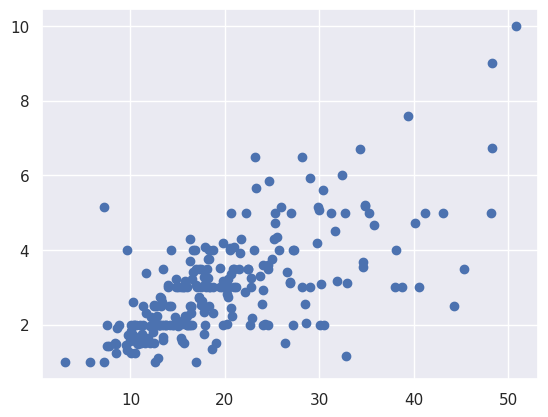

In [ ]:
#Graficar
plt.scatter(data['total_bill'],data['tip'])

Text(0, 0.5, 'Tip')

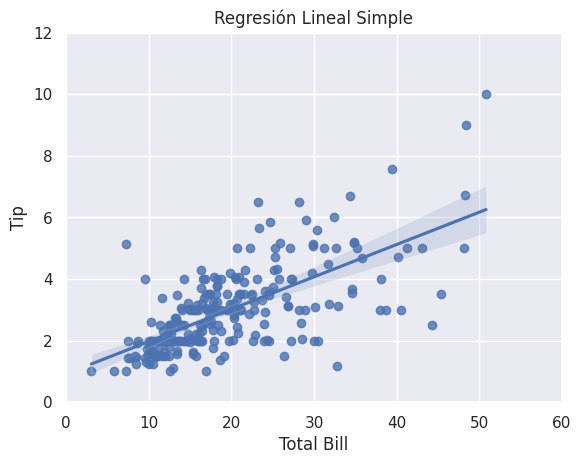

In [ ]:
sns.regplot(x='total_bill',y='tip',data=data)
#personalización
plt.ylim(0,12)
plt.xlim(0,60)
plt.title('Regresión Lineal Simple')
plt.xlabel('Total Bill')
plt.ylabel('Tip')

In [ ]:
#MAE (error absoluto Medio)
mae=np.mean(np.abs(modelo.resid))
mae

np.float64(0.7458253894586339)

In [ ]:
#MSE (Mean Squared Error)Error cuadrático promedio
mse=np.mean(modelo.resid**2)
mse

np.float64(1.036019442011377)

In [ ]:
#RMSE(raiz del error cuadrático promedio)
rmse=np.sqrt(mse)
rmse

np.float64(1.0178504025697377)

In [ ]:
#Generar predicciones
y_pred=modelo.predict(X_cons)
y_pred

,0
0,2.704636
1,2.006223
2,3.126835
3,3.407250
4,3.502822
...,...
239,3.969131
240,3.774836
241,3.301175
242,2.791807


In [ ]:
nueva_cuenta=[1, 50]
prediccion=modelo.predict(nueva_cuenta)
prediccion

array([6.17149548])

In [ ]:
y = 0.9203+(0.1050*50)
y

6.1703

In [ ]:
#predicciones con intervalo de confianza
pred=modelo.get_prediction(nueva_cuenta)
pred.summary_frame(alpha=0.05)

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,6.171495,0.23194,5.714616,6.628375,4.10706,8.235931


## Regresión Lineal Múltiple

In [ ]:
X1 = data[['total_bill','size']] #agregar más de una variable predictora
y1 = data['tip']

In [ ]:
X1_cons=sm.add_constant(X1)
X1_cons.head()

,const,total_bill,size
0,1.0,16.99,2
1,1.0,10.34,3
2,1.0,21.01,3
3,1.0,23.68,2
4,1.0,24.59,4


In [ ]:
modelo1 = sm.OLS(y1, X1_cons).fit()
print(modelo1.summary())

                            OLS Regression Results                            
Dep. Variable:                    tip   R-squared:                       0.468
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     105.9
Date:                Sat, 07 Feb 2026   Prob (F-statistic):           9.67e-34
Time:                        00:35:43   Log-Likelihood:                -347.99
No. Observations:                 244   AIC:                             702.0
Df Residuals:                     241   BIC:                             712.5
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.6689      0.194      3.455      0.0

In [ ]:
#MAE (error absoluto Medio)
mae1=np.mean(np.abs(modelo1.resid))
mae1

np.float64(0.7390035049097032)

## Validar los supuestos del modelo

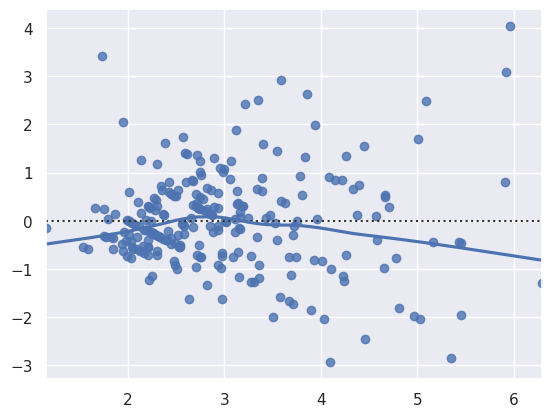

In [ ]:
#Homocedasticidad
residuos=modelo1.resid
fitted=modelo1.fittedvalues
sns.residplot(x=fitted, y=residuos,lowess=True)
plt.show()

Si los valores muestran un patrón aleatorio en torno a la linea 0, el supuesto está cumplido

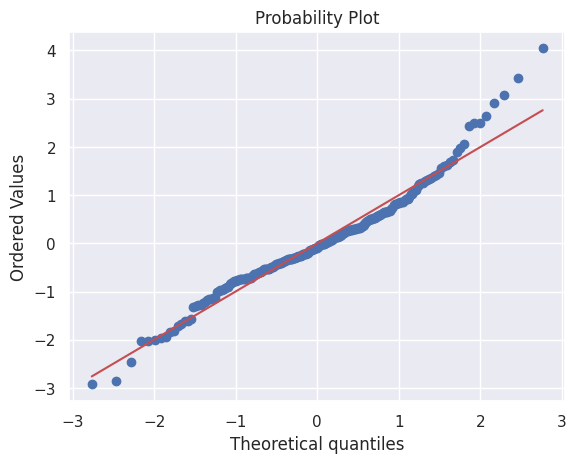

In [ ]:
#Normalidad del error
import scipy.stats as stats
stats.probplot(residuos, dist="norm", plot=plt)
plt.show()
#

In [ ]:
#Multicolinealidad (calcular el VIF)Factor de Inflación de la varianza
from statsmodels.stats.outliers_influence import variance_inflation_factor
# 1. Seleccionamos las variables numéricas para el test (incluyendo la constante)
# Usando el X que definimos en el paso anterior: X = sm.add_constant(tips[['total_bill', 'size']])
variables = X1_cons.columns

# 2. Calculamos el VIF para cada variable
vif_data = pd.DataFrame()
vif_data["Variable"] = variables
vif_data["VIF"] = [variance_inflation_factor(X1_cons.values, i) for i in range(X1_cons.shape[1])]

print(vif_data)


     Variable       VIF
0       const  8.904095
1  total_bill  1.557586
2        size  1.557586


VIF=1: No hay correlación entre estas variables
'1<VIF<5': Correlación moderada
VIF>5 o 10: Multicolienalidad alta

In [ ]:
variables = X1_cons.columns
variables

Index(['const', 'total_bill', 'size'], dtype='object')